In [0]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file

File_ID = '1W30BHG54u6ots9O6Zb0ymXo6wld-YAxD'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('5G8A0034a.jpg')

In [0]:
extract_r = np.ones([3,3,3])/-9
extract_g = np.ones([3,3,3])/-9
extract_b = np.ones([3,3,3])/-9
extract_b[:,:,0] = 2*np.ones([3,3])/9
extract_g[:,:,1] = 2*np.ones([3,3])/9
extract_r[:,:,2] = 2*np.ones([3,3])/9

In [0]:
def convolve3D(image,kernel):
  tmp = kernel.shape[0]
  opx = image.shape[0] - tmp + 1
  opy = image.shape[1] - tmp + 1
  op_img = np.zeros([opx,opy])
  for img_i in range(1,image.shape[0]-1):
    for img_j in range(1,image.shape[1]-1):
      op_pix_val = 0.0
      for i in range(-1,2):
        for j in range(-1,2):
          for k in range(-1,2):
            op_pix_val = op_pix_val + (image[img_i+i,img_j+j,1+k]*kernel[i+1,j+1,k+1])
#       op_img[img_i-1,img_j-1] = int(op_pix_val)  
      if op_pix_val > 0:
        op_img[img_i-1,img_j-1] = int(op_pix_val)
      else:
        op_img[img_i-1,img_j-1] = 0
  return op_img
            

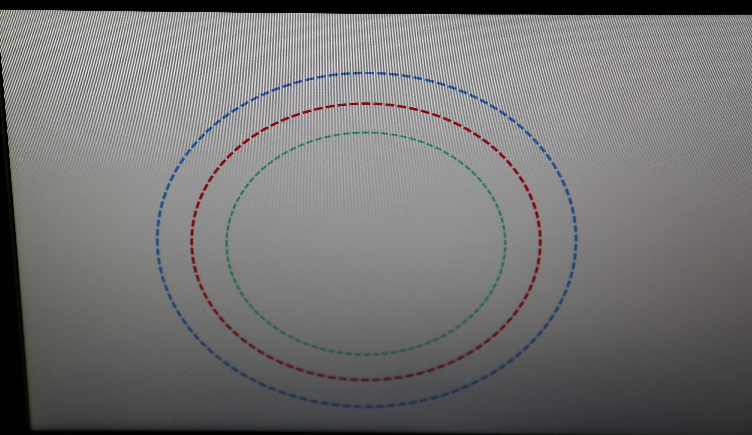

In [4]:
img=cv2.imread('5G8A0034a.jpg')
img=cv2.resize(img,None,fx=0.15,fy=0.15,interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)
red = convolve3D(img,extract_r)
green = convolve3D(img,extract_g)
blue = convolve3D(img,extract_b)

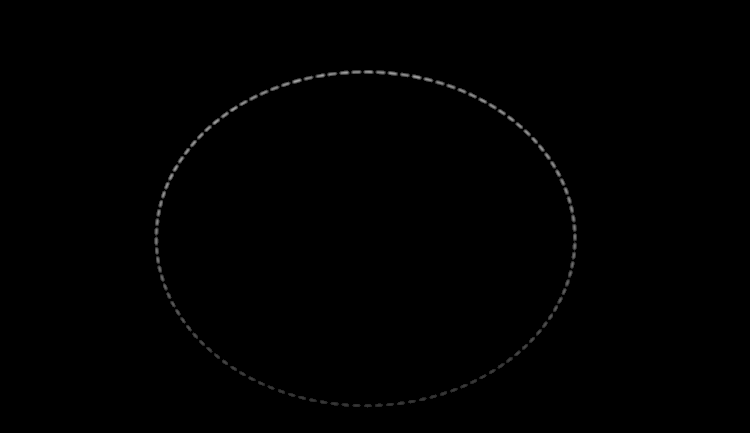

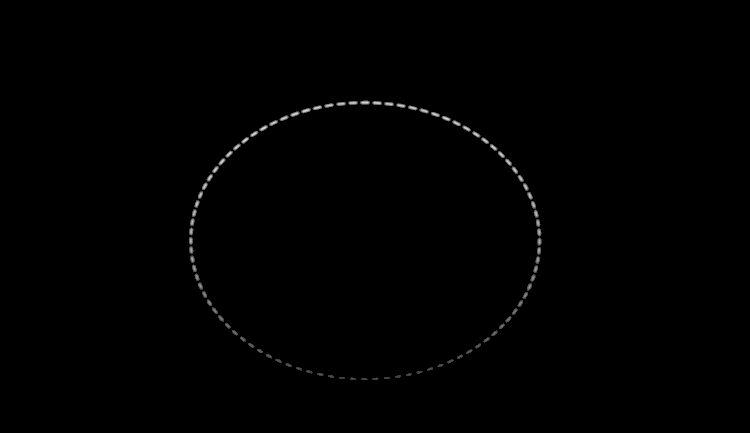

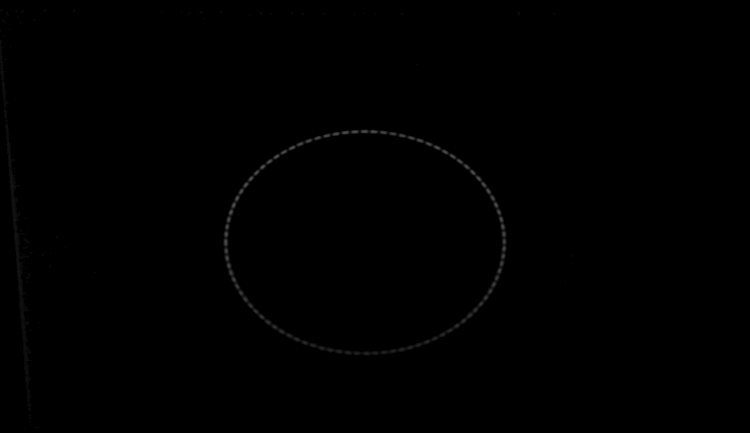

In [5]:
#filters for highlighting respected colors
red[red<50]=0
green[green<8]=0
blue[blue<30]=0
cv2_imshow(blue)
cv2_imshow(red)
cv2_imshow(green)

In [0]:
ret,b = cv2.threshold(blue,30,255,cv2.THRESH_BINARY)
ret,r = cv2.threshold(red,50,255,cv2.THRESH_BINARY)
ret,g = cv2.threshold(green,25,255,cv2.THRESH_BINARY)

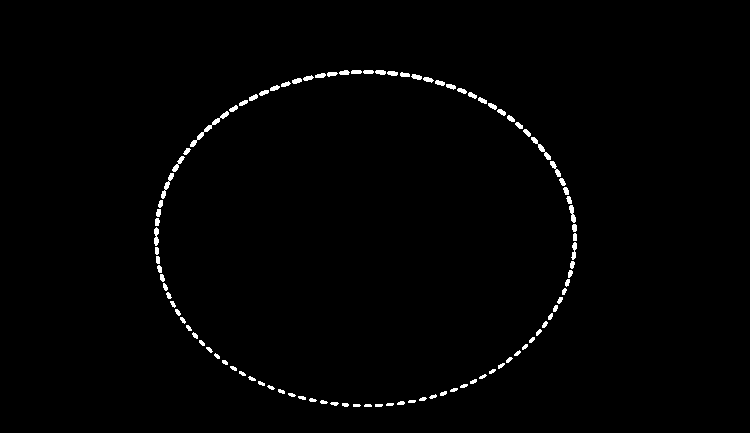

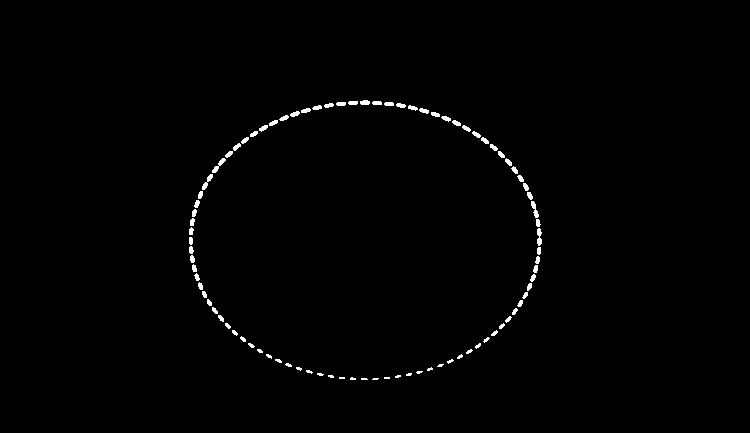

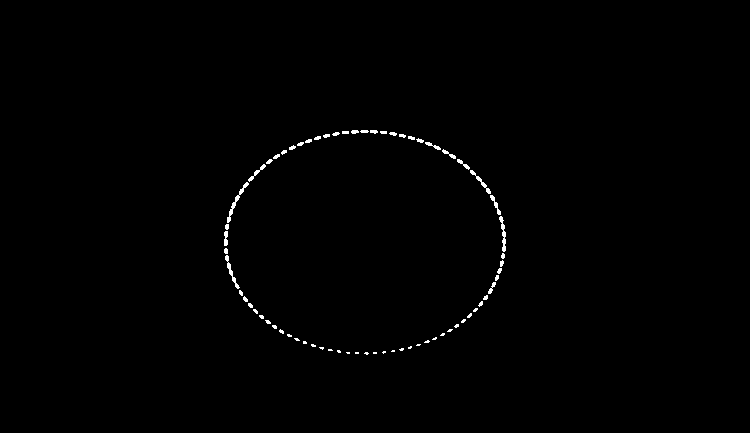

In [7]:
cv2_imshow(b)
cv2_imshow(r)
cv2_imshow(g)

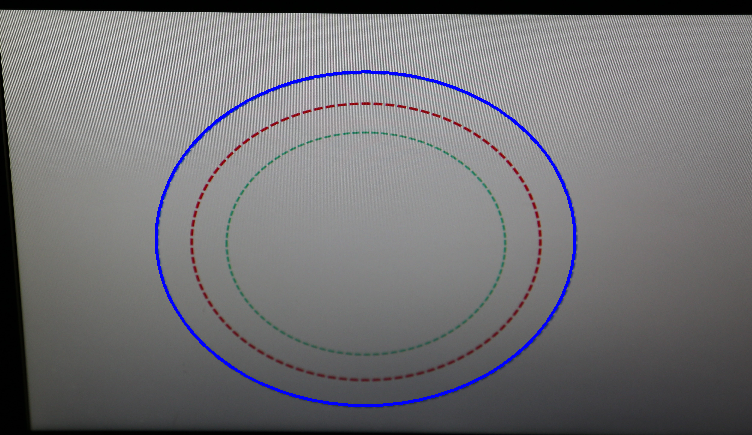

In [8]:
img=cv2.imread('5G8A0034a.jpg')
img=cv2.resize(img,None,fx=0.15,fy=0.15,interpolation=cv2.INTER_CUBIC)
b = np.int32(b)
contours=cv2.findContours(b,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(255,0,0),2)
cv2_imshow(img)

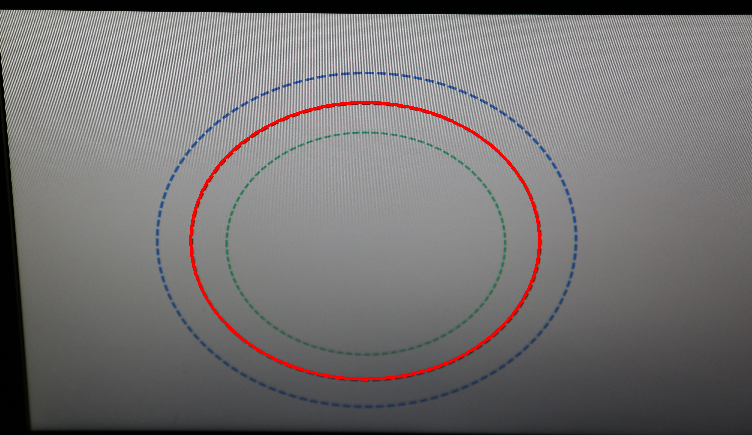

In [9]:
img=cv2.imread('5G8A0034a.jpg')
img=cv2.resize(img,None,fx=0.15,fy=0.15,interpolation=cv2.INTER_CUBIC)
r = np.int32(r)
contours=cv2.findContours(r,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,0,255),2)
cv2_imshow(img)

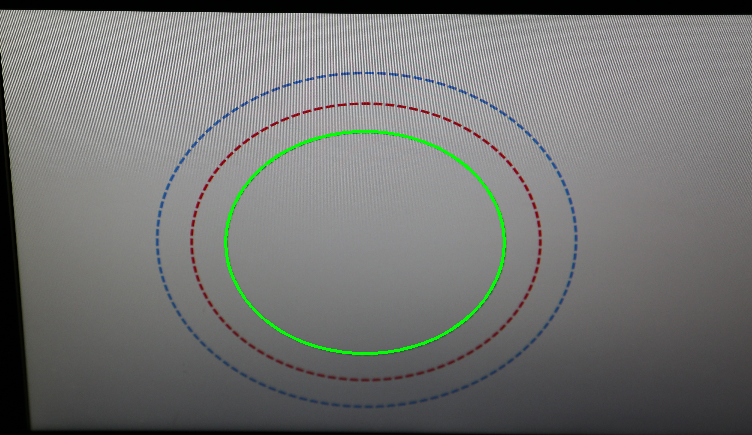

In [10]:
img=cv2.imread('5G8A0034a.jpg')
img=cv2.resize(img,None,fx=0.15,fy=0.15,interpolation=cv2.INTER_CUBIC)
g = np.int32(g)
contours=cv2.findContours(g,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,255,0),2)
cv2_imshow(img)

# Image-2

In [0]:
File_ID = '16Zp_zbOy2SVjO2lTI5UiIQWmraW5Y6So'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('5G8A0038a.jpg')

img=cv2.imread('5G8A0038a.jpg')
img=cv2.resize(img,None,fx=0.15,fy=0.15,interpolation=cv2.INTER_CUBIC)
red = convolve3D(img,extract_r)
green = convolve3D(img,extract_g)
blue = convolve3D(img,extract_b)

In [0]:
#filters for highlighting respected colors
red[red<60]=0
green[green<35]=0
blue[blue<35]=0

In [0]:
ret,b = cv2.threshold(blue,30,255,cv2.THRESH_BINARY)
ret,r = cv2.threshold(red,50,255,cv2.THRESH_BINARY)
ret,g = cv2.threshold(green,25,255,cv2.THRESH_BINARY)

In [0]:
b = np.int32(b)
contours=cv2.findContours(b,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(255,0,0),2)

In [0]:
r = np.int32(r)
contours=cv2.findContours(r,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,0,255),2)

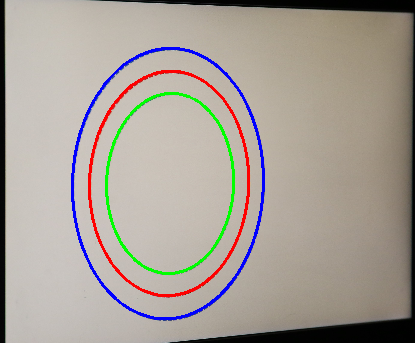

In [66]:
g = np.int32(g)
contours=cv2.findContours(g,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,255,0),2)
cv2_imshow(img)

# Image-3

In [0]:
File_ID = '1FJoNxHuB6lKj07XzLs6iNEBcBW2aAvhp'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('5G8A0042a.jpg')

img=cv2.imread('5G8A0042a.jpg')
img=cv2.resize(img,None,fx=0.15,fy=0.15,interpolation=cv2.INTER_CUBIC)
red = convolve3D(img,extract_r)
green = convolve3D(img,extract_g)
blue = convolve3D(img,extract_b)

In [0]:
#filters for highlighting respected colors
red[red<50]=0
green[green<25]=0
blue[blue<35]=0

In [0]:
ret,b = cv2.threshold(blue,30,255,cv2.THRESH_BINARY)
ret,r = cv2.threshold(red,50,255,cv2.THRESH_BINARY)
ret,g = cv2.threshold(green,25,255,cv2.THRESH_BINARY)

In [0]:
b = np.int32(b)
contours=cv2.findContours(b,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(255,0,0),2)

In [0]:
r = np.int32(r)
contours=cv2.findContours(r,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,0,255),2)

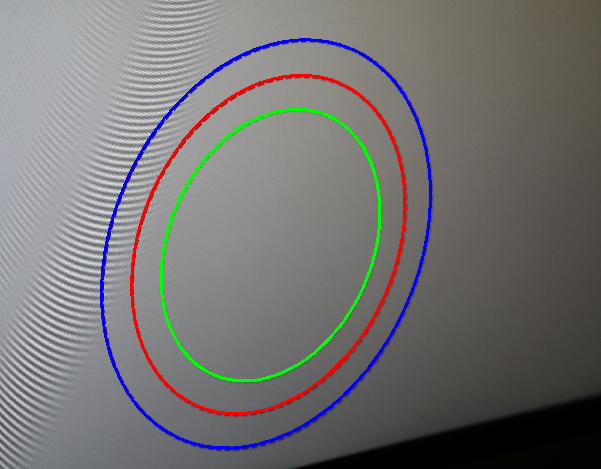

In [72]:
g = np.int32(g)
contours=cv2.findContours(g,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,255,0),2)
cv2_imshow(img)

# Image-4

In [0]:
File_ID = '1PQRursq9BWqVLMiz-QPpLsnTeCB5yRab'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('5G8A0043a.jpg')

img=cv2.imread('5G8A0043a.jpg')
img=cv2.resize(img,None,fx=0.15,fy=0.15,interpolation=cv2.INTER_CUBIC)
red = convolve3D(img,extract_r)
green = convolve3D(img,extract_g)
blue = convolve3D(img,extract_b)

In [0]:
#filters for highlighting respected colors
red[red<65]=0
green[green<35]=0
blue[blue<35]=0

In [0]:
ret,b = cv2.threshold(blue,30,255,cv2.THRESH_BINARY)
ret,r = cv2.threshold(red,50,255,cv2.THRESH_BINARY)
ret,g = cv2.threshold(green,25,255,cv2.THRESH_BINARY)

In [0]:
b = np.int32(b)
contours=cv2.findContours(b,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(255,0,0),2)

In [0]:
r = np.int32(r)
contours=cv2.findContours(r,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,0,255),2)

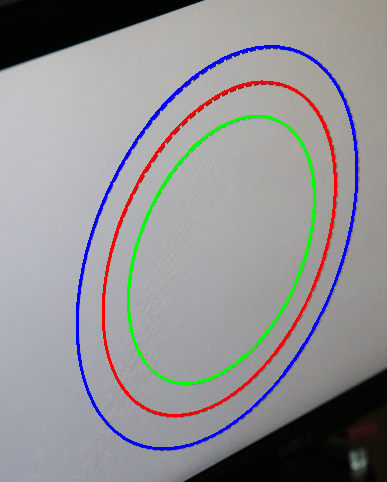

In [135]:
g = np.int32(g)
contours=cv2.findContours(g,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,255,0),2)
cv2_imshow(img)

# Image-5

In [0]:
File_ID = '1bddUYEU9Ht_vkrKWaOdMk7jND_23rW9U'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('5G8A0037a.jpg')

img=cv2.imread('5G8A0037a.jpg')
img=cv2.resize(img,None,fx=0.15,fy=0.15,interpolation=cv2.INTER_CUBIC)
red = convolve3D(img,extract_r)
green = convolve3D(img,extract_g)
blue = convolve3D(img,extract_b)

In [0]:
#filters for highlighting respected colors
red[red<60]=0
green[green<35]=0
blue[blue<25]=0)

In [0]:
ret,b = cv2.threshold(blue,30,255,cv2.THRESH_BINARY)
ret,r = cv2.threshold(red,50,255,cv2.THRESH_BINARY)
ret,g = cv2.threshold(green,25,255,cv2.THRESH_BINARY)

In [0]:
b = np.int32(b)
contours=cv2.findContours(b,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(255,0,0),2)

In [0]:
r = np.int32(r)
contours=cv2.findContours(r,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,0,255),2)

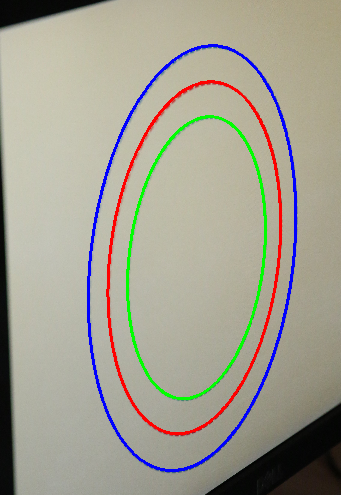

In [107]:
g = np.int32(g)
contours=cv2.findContours(g,2,1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,255,0),2)
cv2_imshow(img)